In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Emplearemos un conjunto de datos sencillo, altura y edad de los alumnos en clase. ¿Podemos derivar uno del otro?

$$

altura = \beta_1 edad + \beta_0

$$

In [6]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

# Ejercicio 1.

Obten un dataframe de los datos indicados.

In [7]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
df


,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


# Ejercicio 2

Realiza una descripción de las distribuciones de las variables.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [9]:
df.describe()


,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


# Ejercicio 3

Divide el conjunto de datos en _train_ y _test_

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[["Edad", "Altura"]], df["Altura"], test_size=0.2, random_state=42)


In [11]:
print(X_train)
print(y_train)

print(X_test)
print(y_test)

print('Train shape')
print(X_train.shape)
print(y_train.shape)

print('Test shape')
print(X_test.shape)
print(y_test.shape)


    Edad  Altura
5     27    1.80
11    30    1.65
3     37    1.63
18    27    1.77
16    27    1.70
13    39    1.80
2     35    1.66
9     45    1.72
20    35    1.80
4     29    1.90
12    40    1.60
7     32    1.60
10    41    1.65
14    23    1.77
19    28    1.70
6     28    1.70
5     1.80
11    1.65
3     1.63
18    1.77
16    1.70
13    1.80
2     1.66
9     1.72
20    1.80
4     1.90
12    1.60
7     1.60
10    1.65
14    1.77
19    1.70
6     1.70
Name: Altura, dtype: float64
    Edad  Altura
0     24    1.82
17    34    1.80
15    32    1.75
1     25    1.71
8     36    1.74
0     1.82
17    1.80
15    1.75
1     1.71
8     1.74
Name: Altura, dtype: float64
Train shape
(16, 2)
(16,)
Test shape
(5, 2)
(5,)


# Ejercicio 4

Entrena un modelo de regresión lineal

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [13]:
lr.score(X_train, y_train)

1.0

In [14]:
lr.score(X_test, y_test)

1.0

# Ejercicio 5

Analiza los coeficientes.

In [15]:
print(lr.intercept_)


-4.440892098500626e-16


In [16]:
print(lr.coef_)


[1.86240391e-18 1.00000000e+00]


In [17]:
coeff_df = pd.DataFrame(lr.coef_, 
                        X_train.columns, 
                        columns=["Coefficient"])
coeff_df


,Coefficient
Edad,1.862404e-18
Altura,1.000000e+00


In [18]:
predictions = lr.predict(X_test)
predictions

array([1.82, 1.8 , 1.75, 1.71, 1.74])

# Ejercicio 6

Evalúa visualmente el modelo.

In [19]:
import seaborn as sns

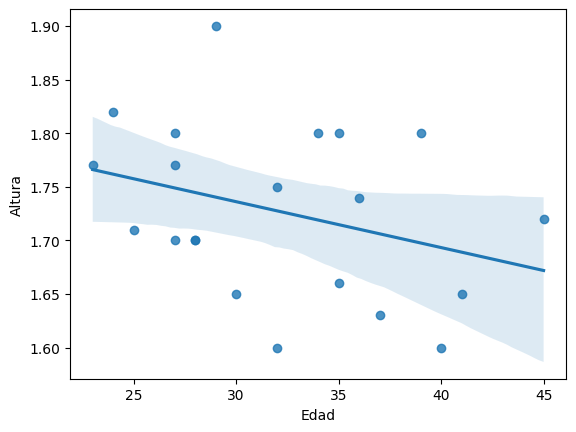

In [24]:
sns.regplot(data = df, x = "Edad", y = "Altura");

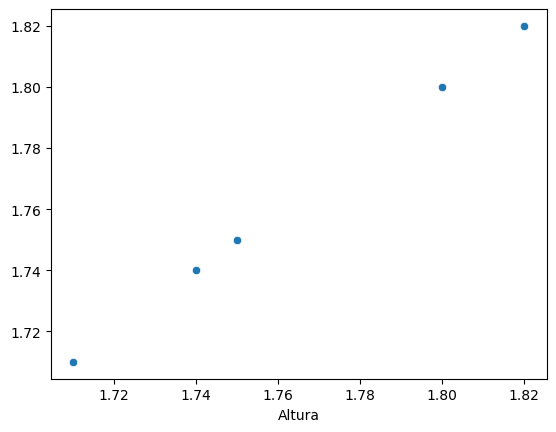

In [21]:
sns.scatterplot(x = y_test, y = predictions);


# Ejercicio 7

Obtén las métricas de error relevantes para este modelo.

In [22]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
